In [5]:
%matplotlib inline

In [6]:
#!pip install tensorflow-addons

In [7]:
import tensorflow as tf
import tensorflow_addons as tfa
import matplotlib.pyplot as plt
import numpy as np

from itertools import tee
from sklearn.metrics import r2_score

In [8]:
def fun( x ):
    np.random.seed(685)
    noise = np.random.normal(0, 0.1, size=x.shape) # 1st arg: mean of the distribution, 2nd arg: Standard deviation of the distribution
    return np.power(x, 2) + noise

(100, 1) (100, 1)


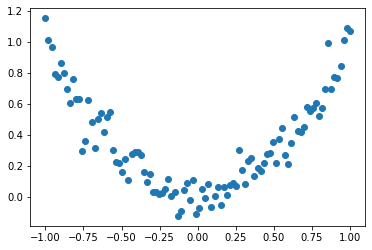

In [9]:
tf.random.set_seed(342)

# preparing dataset
x = np.linspace(-1, 1, 100)[:, np.newaxis]          # shape (100, 1)
#x = np.linspace(-1, 1, 100)[:, None]
#x = np.linspace(-1, 1, 100).reshape(-1,1)

# y =x^2
#y = np.power(x, 2) + noise 
y = fun(x)                         # shape (100, 1) + white noise

print(x.shape,y.shape)

# plot data
plt.scatter(x, y)
plt.show()

In [10]:
# Use these code in python > 3.10
#from itertools import tee, pairwise
#print( pairwise(df.iloc[:-1,0].items()) )

In [11]:
from itertools import tee
def pairwise(iterable):
    # pairwise('ABCDEFG') --> AB BC CD DE EF FG
    # copy iterable object, default n = 2
    a, b = tee(iterable, 2)
    # shift second iterable list
    next(b, None)
    # zip will concate two iterable objects, the length equals the shoest one.
    return zip(a, b)

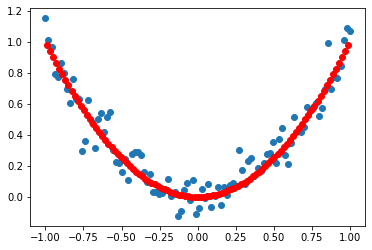

In [12]:
middle = []
formula_val = []
for e1, e2 in pairwise(x):
    middle.append( 0.5 * (e1+e2) )
    formula_val.append( ( 0.5 * (e1+e2))**2 )

x_val = np.array(middle)
y_val = np.array(formula_val)

plt.scatter(x, y)
plt.scatter(x_val, y_val, color='r')
plt.show()

![nn](https://i.imgur.com/AboATTY.png)

In [13]:
# Sequential API

model_seq = tf.keras.Sequential()
model_seq.add(tf.keras.layers.Dense(2, tf.keras.layers.Activation('relu'), input_dim=x.shape[-1]))
model_seq.add(tf.keras.layers.Dense(3, tf.keras.layers.Activation('relu')))
model_seq.add(tf.keras.layers.Dense(3, tf.keras.layers.Activation('relu')))
model_seq.add(tf.keras.layers.Dense(2, tf.keras.layers.Activation('relu')))
model_seq.add(tf.keras.layers.Dense(1))

model_seq.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 4         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 8         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 3         
Total params: 36
Trainable params: 36
Non-trainable params: 0
_________________________________________________________________


In [14]:
model_seq.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Optimizer
    # Loss function to minimize
    loss=tf.keras.losses.MeanSquaredError(),
    # List of metrics to monitor
    metrics=[   tf.keras.metrics.MeanAbsoluteError(),
                tf.keras.metrics.MeanSquaredError(), 
                tf.keras.metrics.RootMeanSquaredError()
            ],
)

In [15]:
print("Fit model on training data")

# initialize tqdm callback with default parameters
tqdm_callback = tfa.callbacks.TQDMProgressBar()

history = model_seq.fit(
    x,
    y,
    batch_size=64,
    epochs=200,
    verbose=0,
    callbacks=[tqdm_callback],
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    #validation_data=(x_val, y_val),
)

Fit model on training data


Training:   0%|           0/200 ETA: ?s,  ?epochs/s

Epoch 1/200


2/2██████████ ETA: 00:00s - loss: 0.1118 - mean_absolute_error: 0.2433 - mean_squared_error: 0.1118 - root_mean_squared_error: 0.3343
Training:   0%|           1/200 ETA: 04:17s,   1.29s/epochs

Epoch 2/200


2/2██████████ ETA: 00:00s - loss: 0.1060 - mean_absolute_error: 0.2355 - mean_squared_error: 0.1060 - root_mean_squared_error: 0.3256


Epoch 3/200


2/2██████████ ETA: 00:00s - loss: 0.1003 - mean_absolute_error: 0.2278 - mean_squared_error: 0.1003 - root_mean_squared_error: 0.3167


Epoch 4/200


2/2██████████ ETA: 00:00s - loss: 0.0953 - mean_absolute_error: 0.2209 - mean_squared_error: 0.0953 - root_mean_squared_error: 0.3086


Epoch 5/200


2/2██████████ ETA: 00:00s - loss: 0.0902 - mean_absolute_error: 0.2150 - mean_squared_error: 0.0902 - root_mean_squared_error: 0.3004


Epoch 6/200


2/2██████████ ETA: 00:00s - loss: 0.0854 - mean_absolute_error: 0.2088 - mean_squared_error: 0.0854 - root_mean_squared_error: 0.2922


Epoch 7/200


2/2██████████ ETA: 00:00s - loss: 0.0805 - mean_absolute_error: 0.2025 - mean_squared_error: 0.0805 - root_mean_squared_error: 0.2838


Epoch 8/200


2/2██████████ ETA: 00:00s - loss: 0.0762 - mean_absolute_error: 0.1972 - mean_squared_error: 0.0762 - root_mean_squared_error: 0.2760
Training:   4%|▍          8/200 ETA: 00:25s,   7.52epochs/s

Epoch 9/200


2/2██████████ ETA: 00:00s - loss: 0.0724 - mean_absolute_error: 0.1926 - mean_squared_error: 0.0724 - root_mean_squared_error: 0.2690


Epoch 10/200


2/2██████████ ETA: 00:00s - loss: 0.0685 - mean_absolute_error: 0.1878 - mean_squared_error: 0.0685 - root_mean_squared_error: 0.2617


Epoch 11/200


2/2██████████ ETA: 00:00s - loss: 0.0652 - mean_absolute_error: 0.1846 - mean_squared_error: 0.0652 - root_mean_squared_error: 0.2553


Epoch 12/200


2/2██████████ ETA: 00:00s - loss: 0.0617 - mean_absolute_error: 0.1809 - mean_squared_error: 0.0617 - root_mean_squared_error: 0.2484


Epoch 13/200


2/2██████████ ETA: 00:00s - loss: 0.0590 - mean_absolute_error: 0.1782 - mean_squared_error: 0.0590 - root_mean_squared_error: 0.2429


Epoch 14/200


2/2██████████ ETA: 00:00s - loss: 0.0563 - mean_absolute_error: 0.1753 - mean_squared_error: 0.0563 - root_mean_squared_error: 0.2373
Training:   7%|▋          14/200 ETA: 00:13s,  13.77epochs/s

Epoch 15/200


2/2██████████ ETA: 00:00s - loss: 0.0538 - mean_absolute_error: 0.1732 - mean_squared_error: 0.0538 - root_mean_squared_error: 0.2321


Epoch 16/200


2/2██████████ ETA: 00:00s - loss: 0.0520 - mean_absolute_error: 0.1720 - mean_squared_error: 0.0520 - root_mean_squared_error: 0.2281


Epoch 17/200


2/2██████████ ETA: 00:00s - loss: 0.0500 - mean_absolute_error: 0.1705 - mean_squared_error: 0.0500 - root_mean_squared_error: 0.2236


Epoch 18/200


2/2██████████ ETA: 00:00s - loss: 0.0487 - mean_absolute_error: 0.1699 - mean_squared_error: 0.0487 - root_mean_squared_error: 0.2208


Epoch 19/200


2/2██████████ ETA: 00:00s - loss: 0.0473 - mean_absolute_error: 0.1689 - mean_squared_error: 0.0473 - root_mean_squared_error: 0.2175


Epoch 20/200


2/2██████████ ETA: 00:00s - loss: 0.0460 - mean_absolute_error: 0.1680 - mean_squared_error: 0.0460 - root_mean_squared_error: 0.2145
Training:  10%|█          20/200 ETA: 00:08s,  20.16epochs/s

Epoch 21/200


2/2██████████ ETA: 00:00s - loss: 0.0452 - mean_absolute_error: 0.1683 - mean_squared_error: 0.0452 - root_mean_squared_error: 0.2127


Epoch 22/200


2/2██████████ ETA: 00:00s - loss: 0.0442 - mean_absolute_error: 0.1679 - mean_squared_error: 0.0442 - root_mean_squared_error: 0.2103


Epoch 23/200


2/2██████████ ETA: 00:00s - loss: 0.0439 - mean_absolute_error: 0.1688 - mean_squared_error: 0.0439 - root_mean_squared_error: 0.2094


Epoch 24/200


2/2██████████ ETA: 00:00s - loss: 0.0432 - mean_absolute_error: 0.1690 - mean_squared_error: 0.0432 - root_mean_squared_error: 0.2078


Epoch 25/200


2/2██████████ ETA: 00:00s - loss: 0.0427 - mean_absolute_error: 0.1693 - mean_squared_error: 0.0427 - root_mean_squared_error: 0.2067


Epoch 26/200


2/2██████████ ETA: 00:00s - loss: 0.0424 - mean_absolute_error: 0.1698 - mean_squared_error: 0.0424 - root_mean_squared_error: 0.2059
Training:  13%|█▎         26/200 ETA: 00:06s,  26.65epochs/s

Epoch 27/200


2/2██████████ ETA: 00:00s - loss: 0.0421 - mean_absolute_error: 0.1700 - mean_squared_error: 0.0421 - root_mean_squared_error: 0.2052


Epoch 28/200


2/2██████████ ETA: 00:00s - loss: 0.0418 - mean_absolute_error: 0.1698 - mean_squared_error: 0.0418 - root_mean_squared_error: 0.2044


Epoch 29/200


2/2██████████ ETA: 00:00s - loss: 0.0414 - mean_absolute_error: 0.1697 - mean_squared_error: 0.0414 - root_mean_squared_error: 0.2035


Epoch 30/200


2/2██████████ ETA: 00:00s - loss: 0.0412 - mean_absolute_error: 0.1696 - mean_squared_error: 0.0412 - root_mean_squared_error: 0.2031


Epoch 31/200


2/2██████████ ETA: 00:00s - loss: 0.0409 - mean_absolute_error: 0.1692 - mean_squared_error: 0.0409 - root_mean_squared_error: 0.2023


Epoch 32/200


2/2██████████ ETA: 00:00s - loss: 0.0407 - mean_absolute_error: 0.1690 - mean_squared_error: 0.0407 - root_mean_squared_error: 0.2017


Epoch 33/200


2/2██████████ ETA: 00:00s - loss: 0.0404 - mean_absolute_error: 0.1685 - mean_squared_error: 0.0404 - root_mean_squared_error: 0.2010
Training:  16%|█▋         33/200 ETA: 00:04s,  34.01epochs/s

Epoch 34/200


2/2██████████ ETA: 00:00s - loss: 0.0401 - mean_absolute_error: 0.1680 - mean_squared_error: 0.0401 - root_mean_squared_error: 0.2002


Epoch 35/200


2/2██████████ ETA: 00:00s - loss: 0.0398 - mean_absolute_error: 0.1674 - mean_squared_error: 0.0398 - root_mean_squared_error: 0.1996


Epoch 36/200


2/2██████████ ETA: 00:00s - loss: 0.0395 - mean_absolute_error: 0.1667 - mean_squared_error: 0.0395 - root_mean_squared_error: 0.1988


Epoch 37/200


2/2██████████ ETA: 00:00s - loss: 0.0392 - mean_absolute_error: 0.1659 - mean_squared_error: 0.0392 - root_mean_squared_error: 0.1980


Epoch 38/200


2/2██████████ ETA: 00:00s - loss: 0.0388 - mean_absolute_error: 0.1650 - mean_squared_error: 0.0388 - root_mean_squared_error: 0.1971


Epoch 39/200


2/2██████████ ETA: 00:00s - loss: 0.0385 - mean_absolute_error: 0.1641 - mean_squared_error: 0.0385 - root_mean_squared_error: 0.1962
Training:  20%|█▉         39/200 ETA: 00:04s,  38.78epochs/s

Epoch 40/200


2/2██████████ ETA: 00:00s - loss: 0.0382 - mean_absolute_error: 0.1633 - mean_squared_error: 0.0382 - root_mean_squared_error: 0.1954


Epoch 41/200


2/2██████████ ETA: 00:00s - loss: 0.0379 - mean_absolute_error: 0.1624 - mean_squared_error: 0.0379 - root_mean_squared_error: 0.1946


Epoch 42/200


2/2██████████ ETA: 00:00s - loss: 0.0375 - mean_absolute_error: 0.1615 - mean_squared_error: 0.0375 - root_mean_squared_error: 0.1937


Epoch 43/200


2/2██████████ ETA: 00:00s - loss: 0.0372 - mean_absolute_error: 0.1606 - mean_squared_error: 0.0372 - root_mean_squared_error: 0.1928


Epoch 44/200


2/2██████████ ETA: 00:00s - loss: 0.0368 - mean_absolute_error: 0.1597 - mean_squared_error: 0.0368 - root_mean_squared_error: 0.1919


Epoch 45/200


2/2██████████ ETA: 00:00s - loss: 0.0365 - mean_absolute_error: 0.1588 - mean_squared_error: 0.0365 - root_mean_squared_error: 0.1910


Epoch 46/200


2/2██████████ ETA: 00:00s - loss: 0.0361 - mean_absolute_error: 0.1578 - mean_squared_error: 0.0361 - root_mean_squared_error: 0.1901
Training:  23%|██▎        46/200 ETA: 00:03s,  44.44epochs/s

Epoch 47/200


2/2██████████ ETA: 00:00s - loss: 0.0358 - mean_absolute_error: 0.1568 - mean_squared_error: 0.0358 - root_mean_squared_error: 0.1892


Epoch 48/200


2/2██████████ ETA: 00:00s - loss: 0.0354 - mean_absolute_error: 0.1558 - mean_squared_error: 0.0354 - root_mean_squared_error: 0.1883


Epoch 49/200


2/2██████████ ETA: 00:00s - loss: 0.0351 - mean_absolute_error: 0.1547 - mean_squared_error: 0.0351 - root_mean_squared_error: 0.1873


Epoch 50/200


2/2██████████ ETA: 00:00s - loss: 0.0348 - mean_absolute_error: 0.1537 - mean_squared_error: 0.0348 - root_mean_squared_error: 0.1864


Epoch 51/200


2/2██████████ ETA: 00:00s - loss: 0.0344 - mean_absolute_error: 0.1527 - mean_squared_error: 0.0344 - root_mean_squared_error: 0.1855


Epoch 52/200


2/2██████████ ETA: 00:00s - loss: 0.0341 - mean_absolute_error: 0.1516 - mean_squared_error: 0.0341 - root_mean_squared_error: 0.1847
Training:  26%|██▌        52/200 ETA: 00:03s,  45.69epochs/s

Epoch 53/200


2/2██████████ ETA: 00:00s - loss: 0.0338 - mean_absolute_error: 0.1505 - mean_squared_error: 0.0338 - root_mean_squared_error: 0.1837


Epoch 54/200


2/2██████████ ETA: 00:00s - loss: 0.0334 - mean_absolute_error: 0.1495 - mean_squared_error: 0.0334 - root_mean_squared_error: 0.1828


Epoch 55/200


2/2██████████ ETA: 00:00s - loss: 0.0331 - mean_absolute_error: 0.1485 - mean_squared_error: 0.0331 - root_mean_squared_error: 0.1819


Epoch 56/200


2/2██████████ ETA: 00:00s - loss: 0.0328 - mean_absolute_error: 0.1475 - mean_squared_error: 0.0328 - root_mean_squared_error: 0.1810


Epoch 57/200


2/2██████████ ETA: 00:00s - loss: 0.0324 - mean_absolute_error: 0.1465 - mean_squared_error: 0.0324 - root_mean_squared_error: 0.1801


Epoch 58/200


2/2██████████ ETA: 00:00s - loss: 0.0321 - mean_absolute_error: 0.1456 - mean_squared_error: 0.0321 - root_mean_squared_error: 0.1792
Training:  29%|██▉        58/200 ETA: 00:03s,  46.58epochs/s

Epoch 59/200


2/2██████████ ETA: 00:00s - loss: 0.0318 - mean_absolute_error: 0.1448 - mean_squared_error: 0.0318 - root_mean_squared_error: 0.1783


Epoch 60/200


2/2██████████ ETA: 00:00s - loss: 0.0314 - mean_absolute_error: 0.1438 - mean_squared_error: 0.0314 - root_mean_squared_error: 0.1772


Epoch 61/200


2/2██████████ ETA: 00:00s - loss: 0.0311 - mean_absolute_error: 0.1428 - mean_squared_error: 0.0311 - root_mean_squared_error: 0.1763


Epoch 62/200


2/2██████████ ETA: 00:00s - loss: 0.0307 - mean_absolute_error: 0.1419 - mean_squared_error: 0.0307 - root_mean_squared_error: 0.1753


Epoch 63/200


2/2██████████ ETA: 00:00s - loss: 0.0304 - mean_absolute_error: 0.1409 - mean_squared_error: 0.0304 - root_mean_squared_error: 0.1743


Epoch 64/200


2/2██████████ ETA: 00:00s - loss: 0.0301 - mean_absolute_error: 0.1400 - mean_squared_error: 0.0301 - root_mean_squared_error: 0.1734
Training:  32%|███▏       64/200 ETA: 00:02s,  48.24epochs/s

Epoch 65/200


2/2██████████ ETA: 00:00s - loss: 0.0297 - mean_absolute_error: 0.1391 - mean_squared_error: 0.0297 - root_mean_squared_error: 0.1724


Epoch 66/200


2/2██████████ ETA: 00:00s - loss: 0.0294 - mean_absolute_error: 0.1383 - mean_squared_error: 0.0294 - root_mean_squared_error: 0.1714


Epoch 67/200


2/2██████████ ETA: 00:00s - loss: 0.0290 - mean_absolute_error: 0.1374 - mean_squared_error: 0.0290 - root_mean_squared_error: 0.1704


Epoch 68/200


2/2██████████ ETA: 00:00s - loss: 0.0287 - mean_absolute_error: 0.1366 - mean_squared_error: 0.0287 - root_mean_squared_error: 0.1693


Epoch 69/200


2/2██████████ ETA: 00:00s - loss: 0.0283 - mean_absolute_error: 0.1357 - mean_squared_error: 0.0283 - root_mean_squared_error: 0.1683


Epoch 70/200


2/2██████████ ETA: 00:00s - loss: 0.0280 - mean_absolute_error: 0.1349 - mean_squared_error: 0.0280 - root_mean_squared_error: 0.1674
Training:  35%|███▌       70/200 ETA: 00:02s,  48.86epochs/s

Epoch 71/200


2/2██████████ ETA: 00:00s - loss: 0.0277 - mean_absolute_error: 0.1342 - mean_squared_error: 0.0277 - root_mean_squared_error: 0.1664

Epoch 72/200



2/2██████████ ETA: 00:00s - loss: 0.0274 - mean_absolute_error: 0.1333 - mean_squared_error: 0.0274 - root_mean_squared_error: 0.1654


Epoch 73/200


2/2██████████ ETA: 00:00s - loss: 0.0270 - mean_absolute_error: 0.1324 - mean_squared_error: 0.0270 - root_mean_squared_error: 0.1644


Epoch 74/200


2/2██████████ ETA: 00:00s - loss: 0.0267 - mean_absolute_error: 0.1314 - mean_squared_error: 0.0267 - root_mean_squared_error: 0.1634


Epoch 75/200


2/2██████████ ETA: 00:00s - loss: 0.0264 - mean_absolute_error: 0.1304 - mean_squared_error: 0.0264 - root_mean_squared_error: 0.1624


Epoch 76/200


2/2██████████ ETA: 00:00s - loss: 0.0261 - mean_absolute_error: 0.1295 - mean_squared_error: 0.0261 - root_mean_squared_error: 0.1615
Training:  38%|███▊       76/200 ETA: 00:02s,  50.08epochs/s

Epoch 77/200


2/2██████████ ETA: 00:00s - loss: 0.0257 - mean_absolute_error: 0.1285 - mean_squared_error: 0.0257 - root_mean_squared_error: 0.1604


Epoch 78/200


2/2██████████ ETA: 00:00s - loss: 0.0254 - mean_absolute_error: 0.1275 - mean_squared_error: 0.0254 - root_mean_squared_error: 0.1594


Epoch 79/200


2/2██████████ ETA: 00:00s - loss: 0.0251 - mean_absolute_error: 0.1266 - mean_squared_error: 0.0251 - root_mean_squared_error: 0.1585


Epoch 80/200


2/2██████████ ETA: 00:00s - loss: 0.0248 - mean_absolute_error: 0.1256 - mean_squared_error: 0.0248 - root_mean_squared_error: 0.1575


Epoch 81/200


2/2██████████ ETA: 00:00s - loss: 0.0245 - mean_absolute_error: 0.1247 - mean_squared_error: 0.0245 - root_mean_squared_error: 0.1565


Epoch 82/200


2/2██████████ ETA: 00:00s - loss: 0.0242 - mean_absolute_error: 0.1237 - mean_squared_error: 0.0242 - root_mean_squared_error: 0.1555
Training:  41%|████       82/200 ETA: 00:02s,  50.79epochs/s

Epoch 83/200


2/2██████████ ETA: 00:00s - loss: 0.0239 - mean_absolute_error: 0.1228 - mean_squared_error: 0.0239 - root_mean_squared_error: 0.1546


Epoch 84/200


2/2██████████ ETA: 00:00s - loss: 0.0236 - mean_absolute_error: 0.1218 - mean_squared_error: 0.0236 - root_mean_squared_error: 0.1536


Epoch 85/200


2/2██████████ ETA: 00:00s - loss: 0.0233 - mean_absolute_error: 0.1210 - mean_squared_error: 0.0233 - root_mean_squared_error: 0.1526


Epoch 86/200


2/2██████████ ETA: 00:00s - loss: 0.0230 - mean_absolute_error: 0.1202 - mean_squared_error: 0.0230 - root_mean_squared_error: 0.1517


Epoch 87/200


2/2██████████ ETA: 00:00s - loss: 0.0227 - mean_absolute_error: 0.1192 - mean_squared_error: 0.0227 - root_mean_squared_error: 0.1506


Epoch 88/200


2/2██████████ ETA: 00:00s - loss: 0.0224 - mean_absolute_error: 0.1184 - mean_squared_error: 0.0224 - root_mean_squared_error: 0.1497
Training:  44%|████▍      88/200 ETA: 00:02s,  52.22epochs/s

Epoch 89/200


2/2██████████ ETA: 00:00s - loss: 0.0221 - mean_absolute_error: 0.1176 - mean_squared_error: 0.0221 - root_mean_squared_error: 0.1487


Epoch 90/200


2/2██████████ ETA: 00:00s - loss: 0.0218 - mean_absolute_error: 0.1168 - mean_squared_error: 0.0218 - root_mean_squared_error: 0.1478


Epoch 91/200


2/2██████████ ETA: 00:00s - loss: 0.0216 - mean_absolute_error: 0.1159 - mean_squared_error: 0.0216 - root_mean_squared_error: 0.1468


Epoch 92/200


2/2██████████ ETA: 00:00s - loss: 0.0212 - mean_absolute_error: 0.1149 - mean_squared_error: 0.0212 - root_mean_squared_error: 0.1458


Epoch 93/200


2/2██████████ ETA: 00:00s - loss: 0.0210 - mean_absolute_error: 0.1139 - mean_squared_error: 0.0210 - root_mean_squared_error: 0.1448


Epoch 94/200


2/2██████████ ETA: 00:00s - loss: 0.0207 - mean_absolute_error: 0.1129 - mean_squared_error: 0.0207 - root_mean_squared_error: 0.1438
Training:  47%|████▋      94/200 ETA: 00:02s,  51.65epochs/s

Epoch 95/200


2/2██████████ ETA: 00:00s - loss: 0.0204 - mean_absolute_error: 0.1119 - mean_squared_error: 0.0204 - root_mean_squared_error: 0.1428


Epoch 96/200


2/2██████████ ETA: 00:00s - loss: 0.0201 - mean_absolute_error: 0.1109 - mean_squared_error: 0.0201 - root_mean_squared_error: 0.1418


Epoch 97/200


2/2██████████ ETA: 00:00s - loss: 0.0198 - mean_absolute_error: 0.1097 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1407


Epoch 98/200


2/2██████████ ETA: 00:00s - loss: 0.0195 - mean_absolute_error: 0.1087 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1397


Epoch 99/200


2/2██████████ ETA: 00:00s - loss: 0.0192 - mean_absolute_error: 0.1075 - mean_squared_error: 0.0192 - root_mean_squared_error: 0.1386


Epoch 100/200


2/2██████████ ETA: 00:00s - loss: 0.0189 - mean_absolute_error: 0.1064 - mean_squared_error: 0.0189 - root_mean_squared_error: 0.1374
Training:  50%|█████      100/200 ETA: 00:01s,  50.91epochs/s

Epoch 101/200


2/2██████████ ETA: 00:00s - loss: 0.0186 - mean_absolute_error: 0.1053 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1363


Epoch 102/200


2/2██████████ ETA: 00:00s - loss: 0.0183 - mean_absolute_error: 0.1041 - mean_squared_error: 0.0183 - root_mean_squared_error: 0.1351


Epoch 103/200


2/2██████████ ETA: 00:00s - loss: 0.0179 - mean_absolute_error: 0.1031 - mean_squared_error: 0.0179 - root_mean_squared_error: 0.1338


Epoch 104/200


2/2██████████ ETA: 00:00s - loss: 0.0176 - mean_absolute_error: 0.1020 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1326


Epoch 105/200


2/2██████████ ETA: 00:00s - loss: 0.0172 - mean_absolute_error: 0.1010 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1313


Epoch 106/200


2/2██████████ ETA: 00:00s - loss: 0.0169 - mean_absolute_error: 0.1002 - mean_squared_error: 0.0169 - root_mean_squared_error: 0.1302
Training:  53%|█████▎     106/200 ETA: 00:01s,  50.34epochs/s

Epoch 107/200


2/2██████████ ETA: 00:00s - loss: 0.0167 - mean_absolute_error: 0.0994 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1291


Epoch 108/200


2/2██████████ ETA: 00:00s - loss: 0.0165 - mean_absolute_error: 0.0988 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1284


Epoch 109/200


2/2██████████ ETA: 00:00s - loss: 0.0163 - mean_absolute_error: 0.0985 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1277


Epoch 110/200


2/2██████████ ETA: 00:00s - loss: 0.0161 - mean_absolute_error: 0.0980 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1270


Epoch 111/200


2/2██████████ ETA: 00:00s - loss: 0.0159 - mean_absolute_error: 0.0975 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1262


Epoch 112/200


2/2██████████ ETA: 00:00s - loss: 0.0157 - mean_absolute_error: 0.0970 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1254
Training:  56%|█████▌     112/200 ETA: 00:01s,  49.99epochs/s

Epoch 113/200


2/2██████████ ETA: 00:00s - loss: 0.0156 - mean_absolute_error: 0.0967 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1248


Epoch 114/200


2/2██████████ ETA: 00:00s - loss: 0.0153 - mean_absolute_error: 0.0960 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1239


Epoch 115/200


2/2██████████ ETA: 00:00s - loss: 0.0152 - mean_absolute_error: 0.0955 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1234


Epoch 116/200


2/2██████████ ETA: 00:00s - loss: 0.0151 - mean_absolute_error: 0.0950 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1227


Epoch 117/200


2/2██████████ ETA: 00:00s - loss: 0.0149 - mean_absolute_error: 0.0944 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1222


Epoch 118/200


2/2██████████ ETA: 00:00s - loss: 0.0148 - mean_absolute_error: 0.0937 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1215
Training:  59%|█████▉     118/200 ETA: 00:01s,  51.33epochs/s

Epoch 119/200


2/2██████████ ETA: 00:00s - loss: 0.0146 - mean_absolute_error: 0.0931 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1210


Epoch 120/200


2/2██████████ ETA: 00:00s - loss: 0.0145 - mean_absolute_error: 0.0927 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1206


Epoch 121/200


2/2██████████ ETA: 00:00s - loss: 0.0144 - mean_absolute_error: 0.0923 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1201


Epoch 122/200


2/2██████████ ETA: 00:00s - loss: 0.0143 - mean_absolute_error: 0.0919 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1197


Epoch 123/200


2/2██████████ ETA: 00:00s - loss: 0.0142 - mean_absolute_error: 0.0915 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1192


Epoch 124/200


2/2██████████ ETA: 00:00s - loss: 0.0141 - mean_absolute_error: 0.0910 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1187
Training:  62%|██████▏    124/200 ETA: 00:01s,  52.22epochs/s

Epoch 125/200


2/2██████████ ETA: 00:00s - loss: 0.0140 - mean_absolute_error: 0.0907 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1183


Epoch 126/200


2/2██████████ ETA: 00:00s - loss: 0.0139 - mean_absolute_error: 0.0904 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1179


Epoch 127/200


2/2██████████ ETA: 00:00s - loss: 0.0138 - mean_absolute_error: 0.0900 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1174


Epoch 128/200


2/2██████████ ETA: 00:00s - loss: 0.0137 - mean_absolute_error: 0.0898 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1171


Epoch 129/200


2/2██████████ ETA: 00:00s - loss: 0.0136 - mean_absolute_error: 0.0895 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1167

Epoch 130/200



2/2██████████ ETA: 00:00s - loss: 0.0136 - mean_absolute_error: 0.0893 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1164
Training:  65%|██████▌    130/200 ETA: 00:01s,  52.51epochs/s

Epoch 131/200


2/2██████████ ETA: 00:00s - loss: 0.0135 - mean_absolute_error: 0.0890 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1161


Epoch 132/200


2/2██████████ ETA: 00:00s - loss: 0.0134 - mean_absolute_error: 0.0887 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1158


Epoch 133/200


2/2██████████ ETA: 00:00s - loss: 0.0133 - mean_absolute_error: 0.0884 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1154


Epoch 134/200


2/2██████████ ETA: 00:00s - loss: 0.0132 - mean_absolute_error: 0.0881 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1151


Epoch 135/200


2/2██████████ ETA: 00:00s - loss: 0.0132 - mean_absolute_error: 0.0879 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1149


Epoch 136/200


2/2██████████ ETA: 00:00s - loss: 0.0132 - mean_absolute_error: 0.0877 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1147
Training:  68%|██████▊    136/200 ETA: 00:01s,  52.10epochs/s

Epoch 137/200


2/2██████████ ETA: 00:00s - loss: 0.0131 - mean_absolute_error: 0.0874 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1144


Epoch 138/200


2/2██████████ ETA: 00:00s - loss: 0.0130 - mean_absolute_error: 0.0872 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1141


Epoch 139/200


2/2██████████ ETA: 00:00s - loss: 0.0130 - mean_absolute_error: 0.0870 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1139


Epoch 140/200


2/2██████████ ETA: 00:00s - loss: 0.0129 - mean_absolute_error: 0.0866 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1136


Epoch 141/200


2/2██████████ ETA: 00:00s - loss: 0.0129 - mean_absolute_error: 0.0864 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1134


Epoch 142/200


2/2██████████ ETA: 00:00s - loss: 0.0128 - mean_absolute_error: 0.0862 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1131
Training:  71%|███████    142/200 ETA: 00:01s,  51.81epochs/s

Epoch 143/200


2/2██████████ ETA: 00:00s - loss: 0.0128 - mean_absolute_error: 0.0860 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1130


Epoch 144/200


2/2██████████ ETA: 00:00s - loss: 0.0127 - mean_absolute_error: 0.0858 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1127


Epoch 145/200


2/2██████████ ETA: 00:00s - loss: 0.0127 - mean_absolute_error: 0.0856 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1125


Epoch 146/200


2/2██████████ ETA: 00:00s - loss: 0.0126 - mean_absolute_error: 0.0855 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1123


Epoch 147/200


2/2██████████ ETA: 00:00s - loss: 0.0126 - mean_absolute_error: 0.0853 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1121

Epoch 148/200

2/2██████████ ETA: 00:00s - loss: 0.0125 - mean_absolute_error: 0.0850 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1119
Training:  74%|███████▍   148/200 ETA: 00:00s,  53.22epochs/s

Epoch 149/200


2/2██████████ ETA: 00:00s - loss: 0.0125 - mean_absolute_error: 0.0848 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1117


Epoch 150/200


2/2██████████ ETA: 00:00s - loss: 0.0124 - mean_absolute_error: 0.0846 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1115


Epoch 151/200


2/2██████████ ETA: 00:00s - loss: 0.0124 - mean_absolute_error: 0.0844 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1113


Epoch 152/200


2/2██████████ ETA: 00:00s - loss: 0.0124 - mean_absolute_error: 0.0842 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1112


Epoch 153/200


2/2██████████ ETA: 00:00s - loss: 0.0123 - mean_absolute_error: 0.0840 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1109


Epoch 154/200


2/2██████████ ETA: 00:00s - loss: 0.0123 - mean_absolute_error: 0.0838 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1108
Training:  77%|███████▋   154/200 ETA: 00:00s,  49.01epochs/s

Epoch 155/200


2/2██████████ ETA: 00:00s - loss: 0.0122 - mean_absolute_error: 0.0837 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1106


Epoch 156/200


2/2██████████ ETA: 00:00s - loss: 0.0122 - mean_absolute_error: 0.0834 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1103


Epoch 157/200


2/2██████████ ETA: 00:00s - loss: 0.0121 - mean_absolute_error: 0.0833 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1101


Epoch 158/200


2/2██████████ ETA: 00:00s - loss: 0.0121 - mean_absolute_error: 0.0831 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1100


Epoch 159/200


2/2██████████ ETA: 00:00s - loss: 0.0120 - mean_absolute_error: 0.0829 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1098
Training:  80%|███████▉   159/200 ETA: 00:00s,  48.71epochs/s

Epoch 160/200


2/2██████████ ETA: 00:00s - loss: 0.0120 - mean_absolute_error: 0.0827 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1095


Epoch 161/200


2/2██████████ ETA: 00:00s - loss: 0.0119 - mean_absolute_error: 0.0826 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1093


Epoch 162/200


2/2██████████ ETA: 00:00s - loss: 0.0119 - mean_absolute_error: 0.0824 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1091


Epoch 163/200


2/2██████████ ETA: 00:00s - loss: 0.0119 - mean_absolute_error: 0.0823 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1089


Epoch 164/200


2/2██████████ ETA: 00:00s - loss: 0.0118 - mean_absolute_error: 0.0821 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1086

Epoch 165/200



2/2██████████ ETA: 00:00s - loss: 0.0118 - mean_absolute_error: 0.0819 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1084
Training:  82%|████████▎  165/200 ETA: 00:00s,  49.49epochs/s

Epoch 166/200


2/2██████████ ETA: 00:00s - loss: 0.0117 - mean_absolute_error: 0.0817 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1082


Epoch 167/200


2/2██████████ ETA: 00:00s - loss: 0.0117 - mean_absolute_error: 0.0817 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1080


Epoch 168/200


2/2██████████ ETA: 00:00s - loss: 0.0116 - mean_absolute_error: 0.0815 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.1078


Epoch 169/200


2/2██████████ ETA: 00:00s - loss: 0.0116 - mean_absolute_error: 0.0814 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.1076


Epoch 170/200


2/2██████████ ETA: 00:00s - loss: 0.0115 - mean_absolute_error: 0.0814 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.1074


Epoch 171/200


2/2██████████ ETA: 00:00s - loss: 0.0115 - mean_absolute_error: 0.0812 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.1072
Training:  86%|████████▌  171/200 ETA: 00:00s,  50.62epochs/s

Epoch 172/200


2/2██████████ ETA: 00:00s - loss: 0.0115 - mean_absolute_error: 0.0811 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.1071


Epoch 173/200


2/2██████████ ETA: 00:00s - loss: 0.0114 - mean_absolute_error: 0.0810 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1068


Epoch 174/200


2/2██████████ ETA: 00:00s - loss: 0.0114 - mean_absolute_error: 0.0809 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1067


Epoch 175/200


2/2██████████ ETA: 00:00s - loss: 0.0113 - mean_absolute_error: 0.0808 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.1065


Epoch 176/200


2/2██████████ ETA: 00:00s - loss: 0.0113 - mean_absolute_error: 0.0807 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.1063


Epoch 177/200


2/2██████████ ETA: 00:00s - loss: 0.0113 - mean_absolute_error: 0.0805 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.1061
Training:  88%|████████▊  177/200 ETA: 00:00s,  51.51epochs/s

Epoch 178/200


2/2██████████ ETA: 00:00s - loss: 0.0112 - mean_absolute_error: 0.0804 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.1060


Epoch 179/200


2/2██████████ ETA: 00:00s - loss: 0.0112 - mean_absolute_error: 0.0803 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.1058


Epoch 180/200


2/2██████████ ETA: 00:00s - loss: 0.0111 - mean_absolute_error: 0.0800 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.1056


Epoch 181/200


2/2██████████ ETA: 00:00s - loss: 0.0111 - mean_absolute_error: 0.0798 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.1054


Epoch 182/200


2/2██████████ ETA: 00:00s - loss: 0.0111 - mean_absolute_error: 0.0795 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.1051


Epoch 183/200


2/2██████████ ETA: 00:00s - loss: 0.0110 - mean_absolute_error: 0.0793 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.1049
Training:  92%|█████████▏ 183/200 ETA: 00:00s,  51.81epochs/s

Epoch 184/200


2/2██████████ ETA: 00:00s - loss: 0.0110 - mean_absolute_error: 0.0791 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.1048


Epoch 185/200


2/2██████████ ETA: 00:00s - loss: 0.0109 - mean_absolute_error: 0.0790 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.1046


Epoch 186/200


2/2██████████ ETA: 00:00s - loss: 0.0109 - mean_absolute_error: 0.0788 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.1044


Epoch 187/200


2/2██████████ ETA: 00:00s - loss: 0.0109 - mean_absolute_error: 0.0788 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.1043


Epoch 188/200


2/2██████████ ETA: 00:00s - loss: 0.0108 - mean_absolute_error: 0.0785 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.1040


Epoch 189/200


2/2██████████ ETA: 00:00s - loss: 0.0108 - mean_absolute_error: 0.0783 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.1039
Training:  94%|█████████▍ 189/200 ETA: 00:00s,  52.57epochs/s

Epoch 190/200


2/2██████████ ETA: 00:00s - loss: 0.0107 - mean_absolute_error: 0.0781 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.1037


Epoch 191/200


2/2██████████ ETA: 00:00s - loss: 0.0107 - mean_absolute_error: 0.0780 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.1035


Epoch 192/200


2/2██████████ ETA: 00:00s - loss: 0.0107 - mean_absolute_error: 0.0778 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.1034


Epoch 193/200


2/2██████████ ETA: 00:00s - loss: 0.0107 - mean_absolute_error: 0.0777 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.1033


Epoch 194/200


2/2██████████ ETA: 00:00s - loss: 0.0106 - mean_absolute_error: 0.0774 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.1031


Epoch 195/200


2/2██████████ ETA: 00:00s - loss: 0.0106 - mean_absolute_error: 0.0772 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.1029
Training:  98%|█████████▊ 195/200 ETA: 00:00s,  52.78epochs/s

Epoch 196/200


2/2██████████ ETA: 00:00s - loss: 0.0105 - mean_absolute_error: 0.0771 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.1027


Epoch 197/200


2/2██████████ ETA: 00:00s - loss: 0.0105 - mean_absolute_error: 0.0770 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.1026


Epoch 198/200


2/2██████████ ETA: 00:00s - loss: 0.0105 - mean_absolute_error: 0.0770 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.1025


Epoch 199/200


2/2██████████ ETA: 00:00s - loss: 0.0105 - mean_absolute_error: 0.0769 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.1023


Epoch 200/200


2/2██████████ ETA: 00:00s - loss: 0.0104 - mean_absolute_error: 0.0768 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.1022
Training: 100%|██████████ 200/200 ETA: 00:00s,  39.09epochs/s


In [16]:
history_dict = history.history
history_dict.keys()
mae = history_dict['mean_absolute_error']

loss = history_dict['loss']

epochs_ = range(1,len(mae)+1)

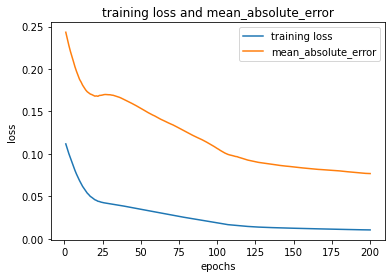

In [17]:
plt.plot(epochs_ , loss , label = 'training loss')
plt.plot(epochs_ , mae , label = 'mean_absolute_error')
plt.title('training loss and mean_absolute_error')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [18]:
# Evaluate the model on the test data using `evaluate`

print("Evaluate on test data")
results = model_seq.evaluate(x_val[:10], y_val[:10], callbacks=[tqdm_callback], verbose=0)
print("test loss, test metric:", results)

Evaluate on test data


1/1██████████ ETA: 00:00s - loss: 0.0045 - mean_absolute_error: 0.0543 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0671

test loss, test metric: [0.004499934613704681, 0.054262906312942505, 0.004499934613704681, 0.06708154827356339]


In [19]:
# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model_seq.predict([0.35, 0.67, 0.93])
print("predictions shape:", predictions.shape)

Generate predictions for 3 samples
predictions shape: (3, 1)


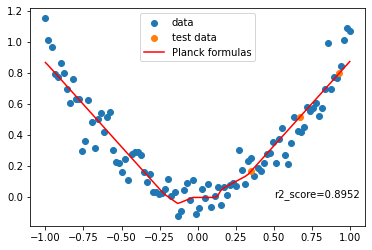

In [21]:
plt.scatter(x, y, label='data')

plt.scatter([0.35, 0.67, 0.93], predictions, label='test data')
plt.plot(x, model_seq.predict(x), color='r', label='Planck formulas')
plt.text(0.5, 0, 'r2_score=%.4f' % r2_score(y, model_seq.predict(x)) )

plt.legend()
plt.show()